# SECTION 08: MULTIPLE REGRESSION Part 2


## LEARNING OBJECTIVES:
- Review the Assumptions of Single Linear Regression.
- Learn about the additional assumption of no multicollinearity of features.
<br>
- Learn how to check data for the assumptions of linear regression.
- Learn about how to improve a baseline model based on results
- Learn how to run a multiple regression using statsmodels
- Learn how to diagnose results
### TOPICS:

### Part 1 [Last Time]:
- Multiple Linear Regression
    - How equation for single variable $ y=mx+b$ becomes:<br> $ \hat Y = \beta_0+\beta_1X_1 + \beta_2X_2+...+\beta_nX_n $
- Dealing with Categorical Variables
    - Label Encoding 
    - One-Hot / Dummy Encoding

### Part 2
- Multicollinearity of Features
- Feature Scaling & Normalization
- Multiple Linear Regression in Statsmodels
- Model Fit and Validation
- Model Diagnostics



# Regression Assumptions


In [15]:
!pip install -U fsds
from fsds.imports import *

Requirement already up-to-date: fsds in /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages (0.2.22)


ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3012, in _dep_map
    return self.__dep_map
  File "/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3003, in _parsed_pkg_info
    return self._pkg_info
  File "/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
 

In [16]:
boston = fs.datasets.load_boston(verbose=True)
boston.columns = [col.lower() for col in boston.columns]
display(boston.head())

[i] Loading boston housing dataset from sklearn.datasets
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [17]:
display(boston.head())
# print(boston.head())
display(boston.info())

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  price    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


None

### 1. Linearity



> The linearity assumptions requires that there is a **linear relationship** between the response variable (Y) and predictor (X). Linear means that the change in Y by 1-unit change in X, is constant. 


<img src="https://raw.githubusercontent.com/learn-co-students/dsc-regression-assumptions-online-ds-ft-100719/master/images/lin_2.png" width=6000>


In [18]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16,16)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning:


The colNum attribute was 

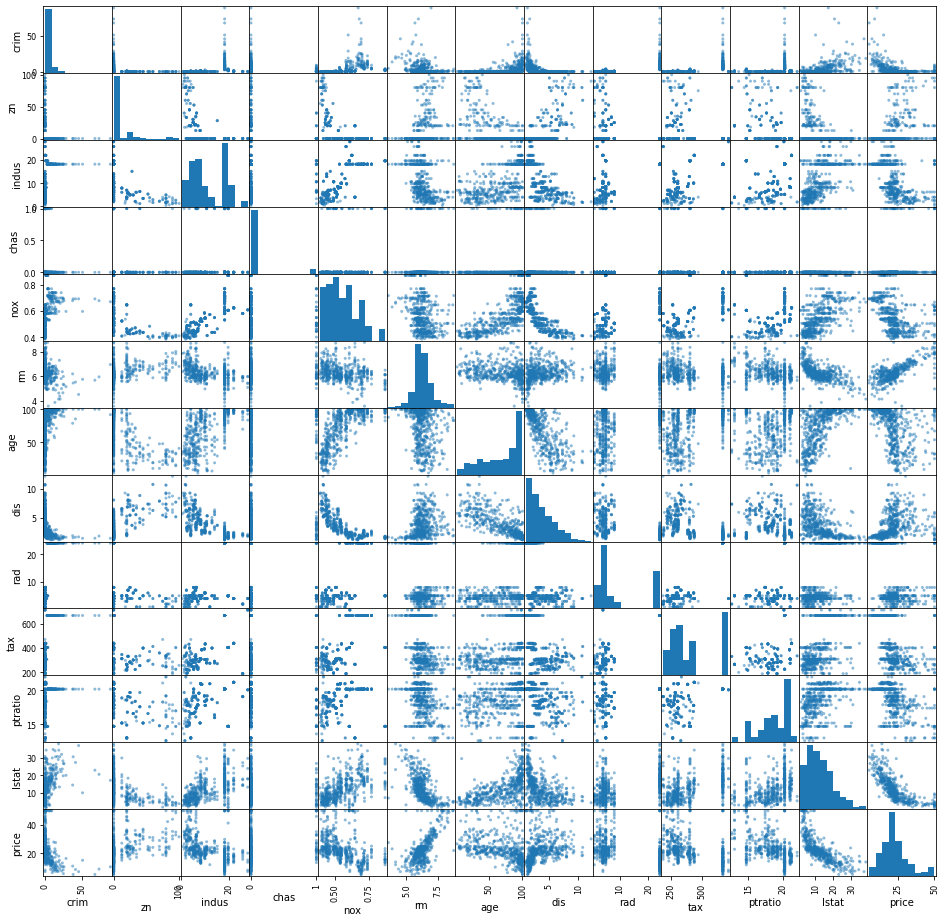

In [19]:
# How do we check for Linear Relationship?
pd.plotting.scatter_matrix(boston);

### 2. Normality 


> The normality assumption states that the **model residuals** should follow a normal distribution

- Note that the normality assumption talks about the **model residuals** and _not_ about the distributions of the **variables**! 
- In general, data scientists will often check the distributions of the variables as well. 
- **The easiest way to check for the normality assumption is with histograms or a Q-Q-Plots.**

<!-- 
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-regression-assumptions-online-ds-ft-100719/master/images/inhouse_histo.png" width="800"> -->


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13d1498d0>,
      dtype=object)

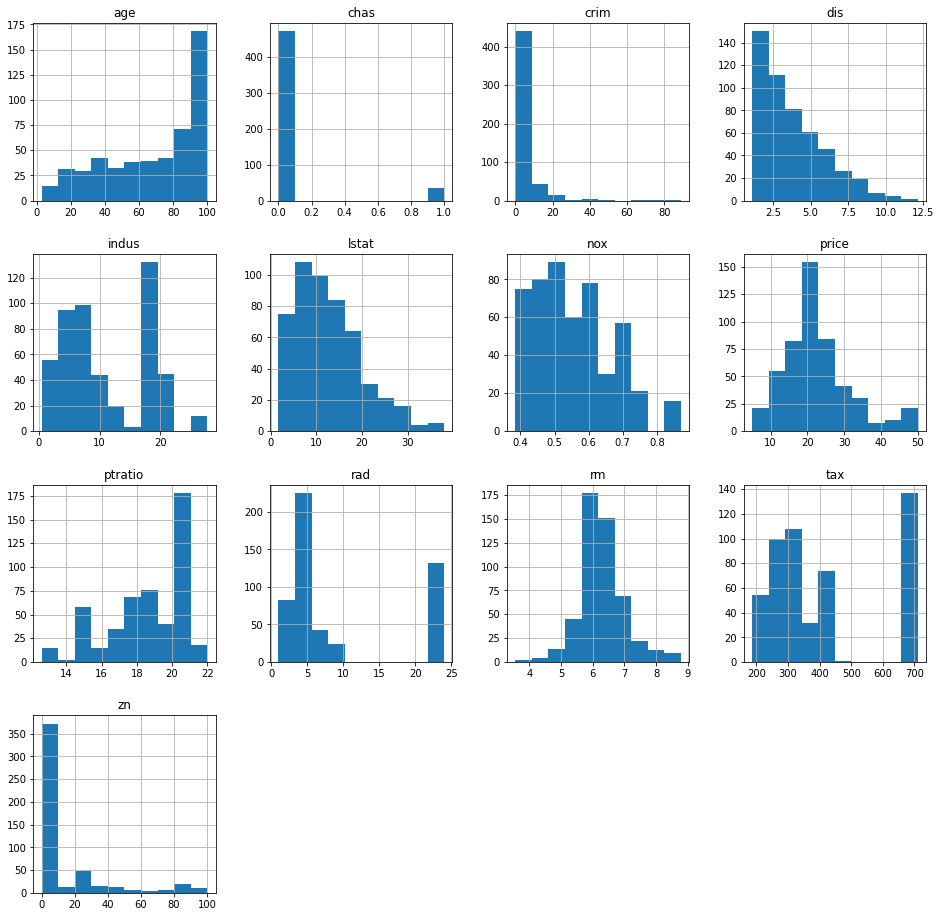

In [20]:
## How do we check for Normality?
boston.hist()

#### Q-Q Plots



>In statistics, a Q–Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other.

- The Q-Q plot (quantile-quantile plot) is used to help assess if a sample comes from a known distribution such as a normal distribution. 
- For regression, when checking if the data in this sample is normally distributed, we can use a Normal Q-Q plot to test that assumption. Remember that this is just a visual check, so the interpretation remains subjective. 


<img src="https://raw.githubusercontent.com/learn-co-students/dsc-regression-assumptions-online-ds-ft-100719/master/images/inhouse_qq_plots.png" width="600">




### 3. Homoscedasticity 



> _Heteroscedasticity_ (also spelled heteroskedasticity) refers to the circumstance in which the dependent variable is unequal across the range of values of the predictor(s).

When there is heteroscedasticity in the data, a scatterplot of these variables will often create a cone-like shape. The scatter of the dependent variable widens or narrows as the value of the independent variable increases. 

The inverse of heteroscedasticity is _homoscedasticity_, which indicates that a dependent variable's variability is equal across values of the independent variable. **Homoscedasticity is the third assumption necessary when creating a linear regression model.**

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-regression-assumptions-online-ds-ft-100719/master/images/homo_2.png" width="700">

**A scatter plot is good way to check whether the data are homoscedastic (meaning the residuals are equal across the regression line).**


In [21]:
## How do we check heteroscedasticity?


### 4. No Multicollinearity

- Assumes that the different predictor variables are not related.
- We use correlation and heatmaps to look for multicollinearity.
    - Guidelines: absolute $r$ about 0.75/0.80 is too highly correlated.


In [22]:
# Checking with pandas alone
corr = boston.corr().round(3)
corr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,price
crim,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,0.456,-0.388
zn,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,-0.413,0.360
indus,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,0.604,-0.484
chas,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,-0.054,0.175
nox,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,0.591,-0.427
rm,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,-0.614,0.695
age,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,0.602,-0.377
dis,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,-0.497,0.250
rad,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,0.489,-0.382
tax,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,0.544,-0.469


In [23]:
np.abs(corr)>0.75

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,price
crim,True,False,False,False,False,False,False,False,False,False,False,False,False
zn,False,True,False,False,False,False,False,False,False,False,False,False,False
indus,False,False,True,False,True,False,False,False,False,False,False,False,False
chas,False,False,False,True,False,False,False,False,False,False,False,False,False
nox,False,False,True,False,True,False,False,True,False,False,False,False,False
rm,False,False,False,False,False,True,False,False,False,False,False,False,False
age,False,False,False,False,False,False,True,False,False,False,False,False,False
dis,False,False,False,False,True,False,False,True,False,False,False,False,False
rad,False,False,False,False,False,False,False,False,True,True,False,False,False
tax,False,False,False,False,False,False,False,False,True,True,False,False,False


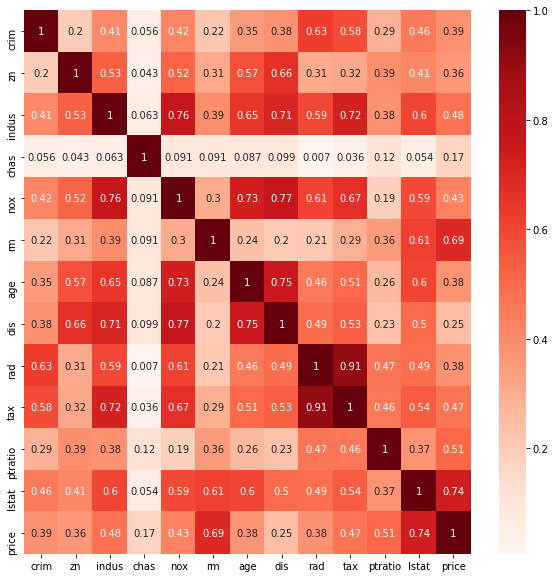

In [24]:
# Checking Visually 
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(np.abs(corr),annot=True,cmap="Reds",ax=ax)

In [25]:
# Checking Visually 

def multiplot(corr,figsize=(12,12)):
    fig, ax = plt.subplots(figsize=figsize)

    mask = np.zeros_like(corr, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True

    sns.heatmap(np.abs(corr),square=True,mask=mask,annot=True,cmap="Reds",ax=ax)
    return fig, ax


### Judging Multicollinearity

In [26]:
try:
    drop_cols = ['dis','tax']
    boston.drop(drop_cols,axis=1,inplace=True)
except:
    print('Dropcols were not in the dataframe.')

(<Figure size 864x864 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13ae05f60>)

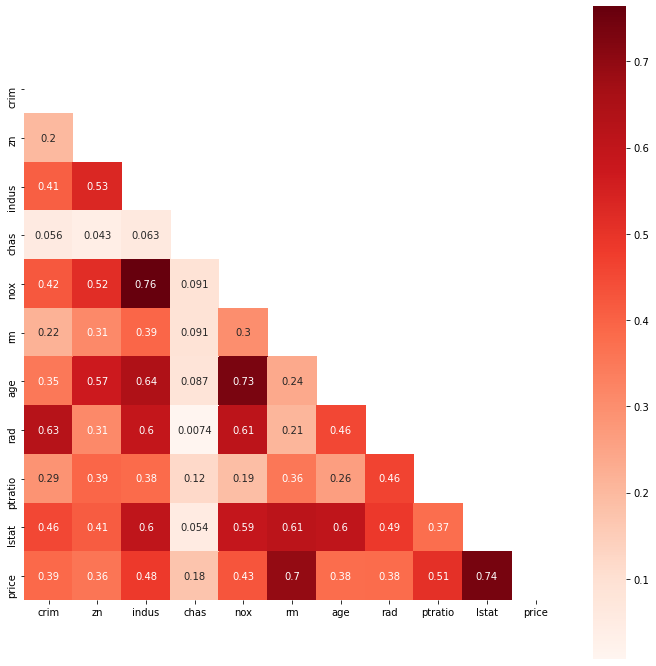

In [27]:
multiplot(np.abs(boston.corr()))

In [28]:
boston.drop('nox',axis=1,inplace=True)

(<Figure size 864x864 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13cf99d30>)

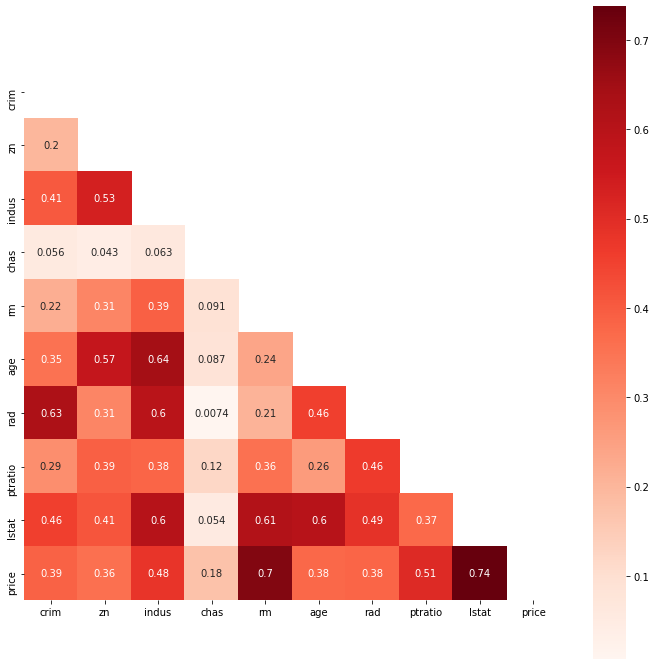

In [29]:
corr = np.abs(boston.corr())
multiplot(corr)

# Feature scaling and normalization

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning:


The colNum attribute was 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13cf06be0>,
      dtype=object)

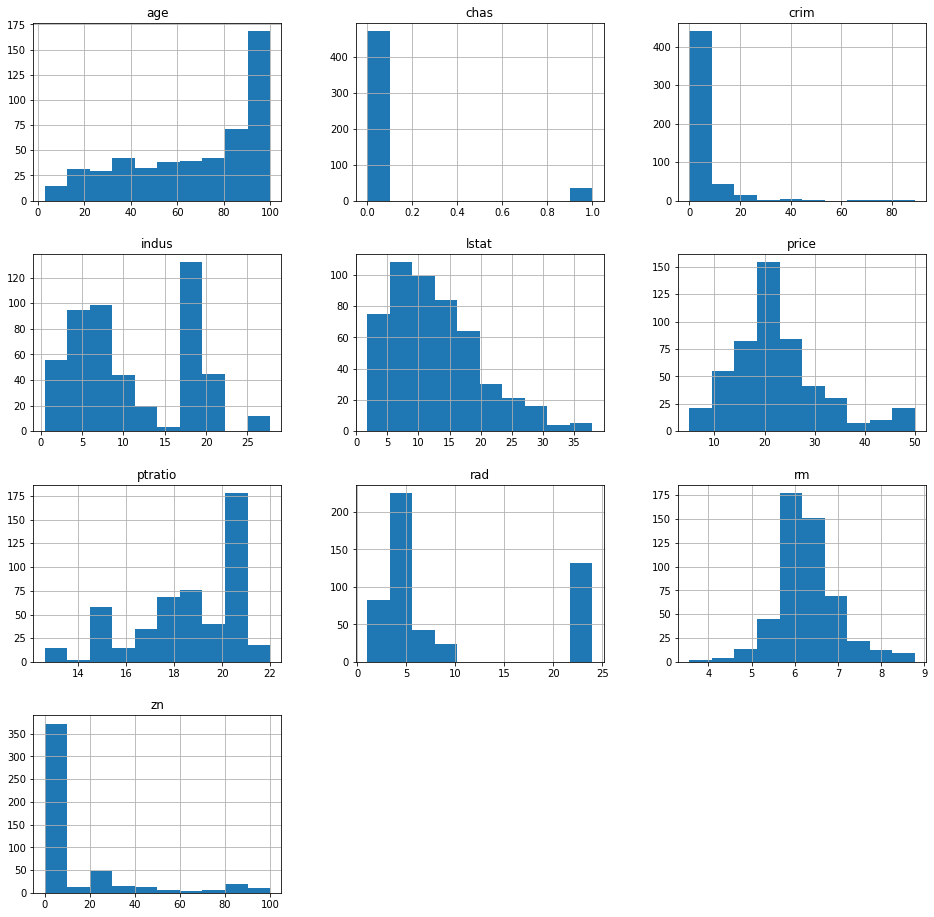

In [30]:
boston.hist()

In [31]:
log_cols =['age','lstat']

for col in log_cols:
    boston[col+'_log'] = np.log(boston[col])

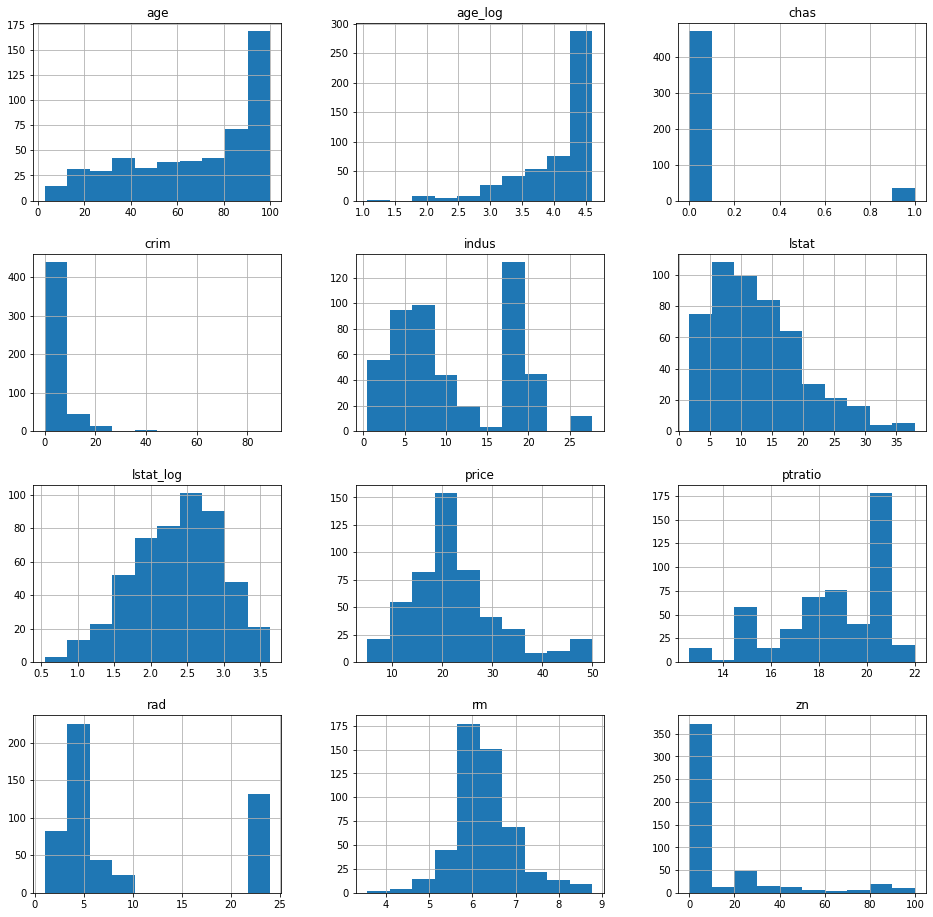

In [32]:
boston.hist();

In [33]:
boston.drop('age_log',axis=1,inplace=True)

### Normalization
Definition: making data distribution more normally distributed
- log transformation
- remove outliers
    - IQR
    - Z-scores.
#### Log transformation

As seen in the previous lesson, a log transformation is a very useful tool when you have data that clearly does not follow a normal distribution. Log transformation can help reduce skewness when you have skewed data, and can help reducing variability of data. 

### Standardization

In [34]:
boston.describe().round(3)

,crim,zn,indus,chas,rm,age,rad,ptratio,lstat,price,lstat_log
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,6.285,68.575,9.549,18.456,12.653,22.533,2.371
std,8.602,23.322,6.860,0.254,0.703,28.149,8.707,2.165,7.141,9.197,0.601
min,0.006,0.000,0.460,0.000,3.561,2.900,1.000,12.600,1.730,5.000,0.548
25%,0.082,0.000,5.190,0.000,5.886,45.025,4.000,17.400,6.950,17.025,1.939
50%,0.257,0.000,9.690,0.000,6.208,77.500,5.000,19.050,11.360,21.200,2.430
75%,3.677,12.500,18.100,0.000,6.624,94.075,24.000,20.200,16.955,25.000,2.831
max,88.976,100.000,27.740,1.000,8.780,100.000,24.000,22.000,37.970,50.000,3.637


### Min-max scaling

When performing min-max scaling, you can transform x to get the transformed $x'$ by using the formula:

$$x' = \dfrac{x - \min(x)}{\max(x)-\min(x)}$$

This way of scaling brings all values between 0 and 1. 

### Standardization

When 

$$x' = \dfrac{x - \bar x}{\sigma}$$

x' will have mean $\mu = 0$ and $\sigma = 1$

Note that standardization does not make data $more$ normal, it will just change the mean and the standard error!

### Mean normalization
When performing mean normalization, you use the following formula:
$$x' = \dfrac{x - \text{mean}(x)}{\max(x)-\min(x)}$$

The distribution will have values 
between -1 and 1, and a mean of 0.


In [35]:
## What columns to treat as categories:
cat_cols= ['chas']
num_cols = boston.drop(['chas','price'],axis=1).columns
num_cols

Index(['crim', 'zn', 'indus', 'rm', 'age', 'rad', 'ptratio', 'lstat',
       'lstat_log'],
      dtype='object')

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(boston[num_cols])

In [37]:
boston.shape

(506, 11)

In [38]:
type(scaled_data), scaled_data.shape

(numpy.ndarray, (506, 9))

In [39]:
boston_scaled = pd.DataFrame(data=scaled_data,columns=num_cols)
boston_scaled.describe().round(3)

,crim,zn,indus,rm,age,rad,ptratio,lstat,lstat_log
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-0.420,-0.488,-1.558,-3.880,-2.335,-0.983,-2.707,-1.531,-3.037
25%,-0.411,-0.488,-0.868,-0.569,-0.837,-0.638,-0.488,-0.799,-0.720
50%,-0.391,-0.488,-0.211,-0.108,0.317,-0.523,0.275,-0.181,0.099
75%,0.007,0.049,1.016,0.483,0.907,1.661,0.807,0.603,0.766
max,9.934,3.804,2.423,3.555,1.117,1.661,1.639,3.549,2.109


In [40]:
boston_scaled['price'] = boston['price']
boston_scaled['chas'] = boston['chas']
boston_scaled.describe().round(3)

,crim,zn,indus,rm,age,rad,ptratio,lstat,lstat_log,price,chas
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,22.533,0.069
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,9.197,0.254
min,-0.420,-0.488,-1.558,-3.880,-2.335,-0.983,-2.707,-1.531,-3.037,5.000,0.000
25%,-0.411,-0.488,-0.868,-0.569,-0.837,-0.638,-0.488,-0.799,-0.720,17.025,0.000
50%,-0.391,-0.488,-0.211,-0.108,0.317,-0.523,0.275,-0.181,0.099,21.200,0.000
75%,0.007,0.049,1.016,0.483,0.907,1.661,0.807,0.603,0.766,25.000,0.000
max,9.934,3.804,2.423,3.555,1.117,1.661,1.639,3.549,2.109,50.000,1.000


In [41]:
df = boston.copy()

In [42]:
df = df.loc[df['crim']<3]

df.loc[df['crim']>3]

,crim,zn,indus,chas,rm,age,rad,ptratio,lstat,price,lstat_log


# Run multiple regression in statsmodels


In [43]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

In [44]:
cols = df.drop(['price','lstat','indus','rad'],axis=1).columns
str_cols = ' + '.join(cols)
str_cols

'crim + zn + chas + rm + age + ptratio + lstat_log'

In [45]:
formula = 'price~'+str_cols
formula

'price~crim + zn + chas + rm + age + ptratio + lstat_log'

In [46]:
model = smf.ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     294.7
Date:                Wed, 15 Jul 2020   Prob (F-statistic):          5.94e-146
Time:                        17:45:44   Log-Likelihood:                -968.73
No. Observations:                 373   AIC:                             1953.
Df Residuals:                     365   BIC:                             1985.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1106      4.345     -2.557      0.011     -19.655      -2.566
crim           0.5078      0.355      1.430      0.154      -0.191       1.206
zn            -0.0203      0.008     -2.433      0.015      -0.037      -0.004
chas           1.9363      0.692      2.798      0.005       0.576       3.297
rm             8.6729      0.446     19.435      0.000       7.795       9.550
age           -0.0257      0.009     -2.808      0.005      -0.044      -0.008
ptratio       -0.6553      0.091     -7.163      0.000      -0.835      -0.475
lstat_log     -2.8160      0.600     -4.690      0.000      -3.997      -1.635
==============================================================================
Omnibus:                       25.725   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.972
Skew:                           0.477   Prob(JB):                     2.09e-09
Kurtosis:                       4.289   Cond. No.                     1.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

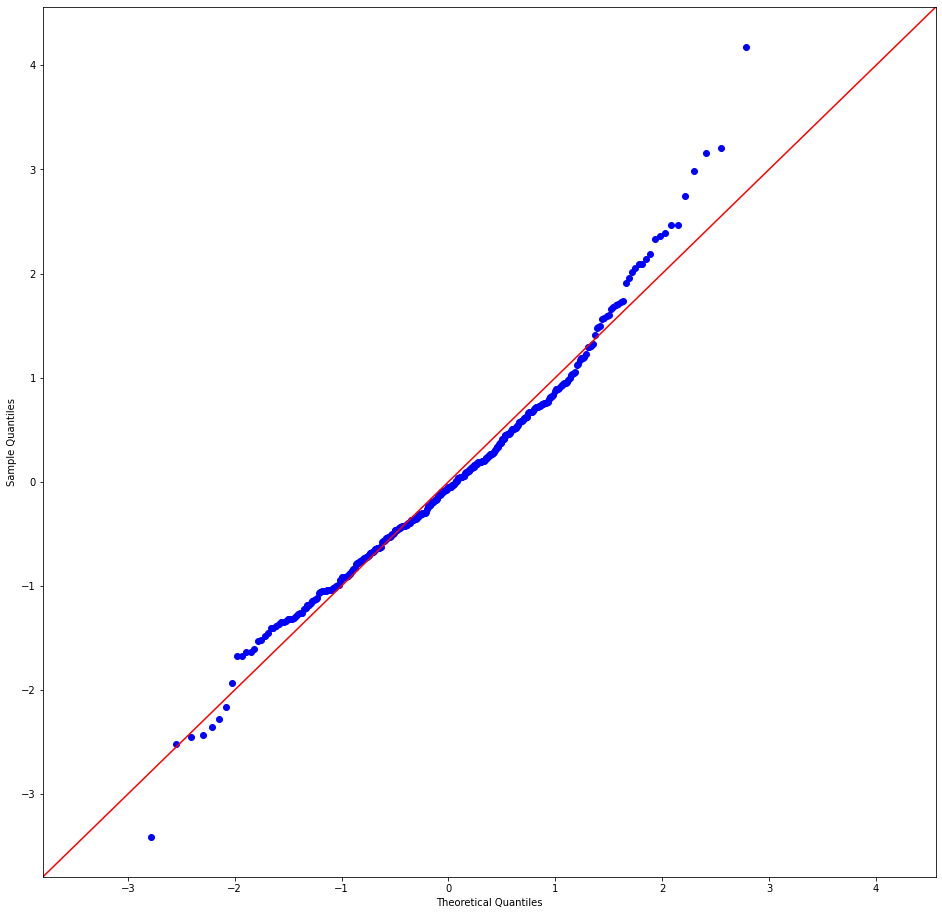

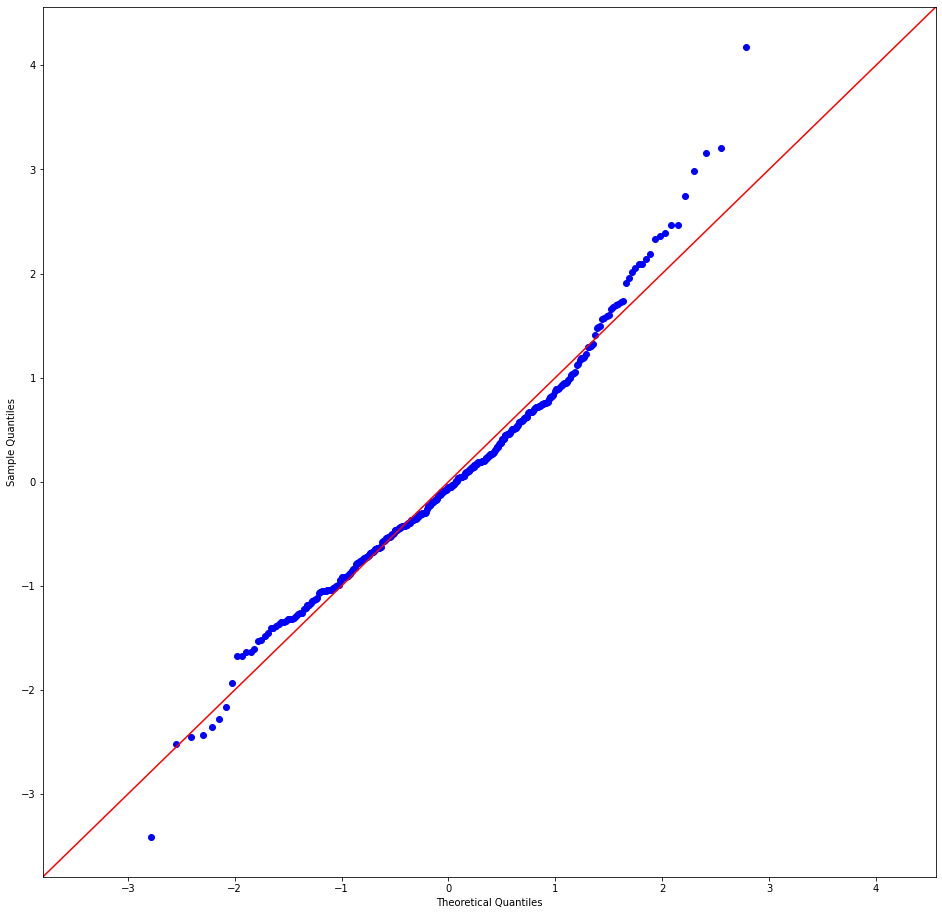

In [47]:
resids = model.resid
import scipy.stats as stats

sm.graphics.qqplot(resids,stats.norm,line='45',fit=True)

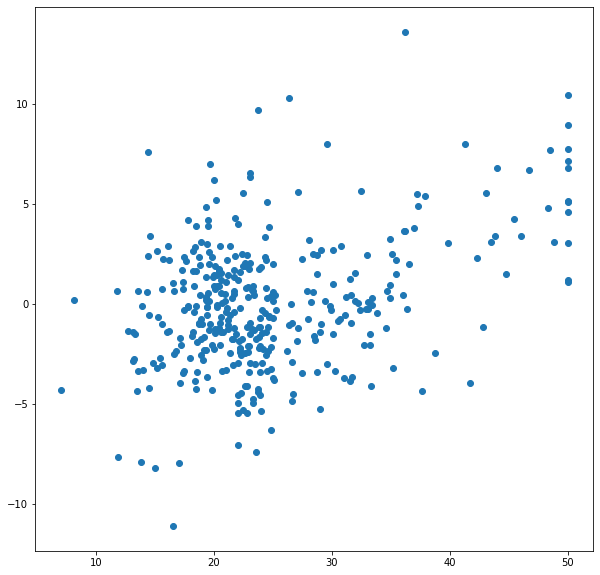

In [48]:
mpl.rcParams['figure.figsize'] = (10,10)
plt.scatter( df['price'],resids,)

### Revisiting Our Assumptions
- Homoskedasticity
- Residuals are Normal 

In [49]:
## Q-Q Plot
import scipy.stats as stats

resid = model.resid 
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True) 
fig.show() 

NameError: name 'resid1' is not defined

In [ ]:
#
plt.plot(resid)

# Model Validation

## Train Test Split

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-regression-model-validation-online-ds-ft-100719/master/images/new_overfit_underfit.png" width=500>

## K-Fold Validation
